Columns in the dataset: Index(['timestamp', 'time', 'temp1', 'temp2', 'bean_type', 'process_type',
       'roasting_batch_id'],
      dtype='object')
Cleaned columns: Index(['timestamp', 'time', 'temp1', 'temp2', 'bean_type', 'process_type',
       'roasting_batch_id'],
      dtype='object')


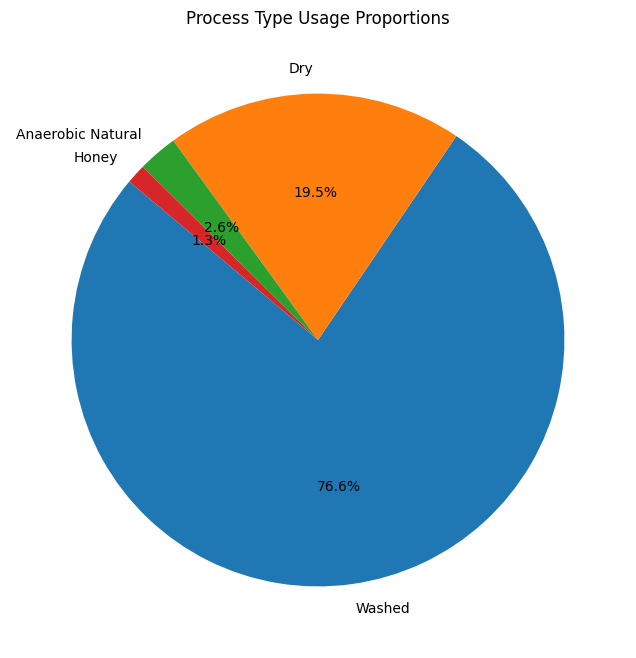

Pie chart saved as Process_type_usage_proportions_pie_chart.png


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data, specifying the delimiter as semicolon
df = pd.read_csv("/Users/lilianlee/SQL.csv", delimiter=";")

# Check the column names in the dataset
print("Columns in the dataset:", df.columns)

# Clean column names by removing extra spaces and converting them to lowercase
df.columns = df.columns.str.strip().str.lower()
print("Cleaned columns:", df.columns)

# Ensure the dataset contains 'roasting_batch_id'
if 'roasting_batch_id' not in df.columns:
    if 'timestamp' in df.columns:  # Ensure 'timestamp' exists
        df['roasting_batch_id'] = df['timestamp'].apply(
            lambda ts: pd.to_datetime(ts).strftime("%y%m%d%H%M")
        )
    else:
        print("Error: 'timestamp' column is missing.")
        raise KeyError("Missing 'timestamp' column in the dataset.")

# Keep only the first record for each batch to avoid duplicate calculations
unique_batches = df.drop_duplicates(subset='roasting_batch_id')

# Calculate the usage ratio of each process type
process_counts = unique_batches['process_type'].value_counts()
process_ratios = process_counts / process_counts.sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    process_ratios, 
    labels=process_ratios.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.tab10.colors
)
plt.title("Process Type Usage Proportions")

# Output the chart name
output_name = "Process_type_preference_pie_chart.png"

# Save or display the chart
# plt.savefig(output_name) 
plt.show()

print(f"Pie chart saved as {output_name}")

